<a href="https://colab.research.google.com/github/IvanWasNotAvailable/StockPricePrediction/blob/main/StockPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
comp = 'BAS.DE'

In [3]:
ticker = yf.Ticker(comp).info
print(ticker.keys())

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'fax', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'for

In [5]:
ticker = yf.Ticker(comp).info
longName = ticker['longName']
fullTimeEmployees = ticker['fullTimeEmployees']
totalCash = ticker['totalCash']
phone = ticker['phone']
print('Company:', longName)
print('FTEs', fullTimeEmployees)
print('TotalCash', totalCash/1000000 , 'M')
print('Tel:', phone)

Company: BASF SE
FTEs 111768
TotalCash 3384.999936 M
Tel: 49 0621 60 0


In [7]:
%pip install yahoofinancials
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd
yahoo_financials = YahooFinancials(comp)
data = yahoo_financials.get_historical_price_data(start_date='2022-01-03', end_date='2022-12-31', time_interval='weekly')
basf_df = pd.DataFrame(data[comp]['prices'])
basf_df = basf_df.drop(['low', 'high', 'adjclose', 'close', 'volume', 'date'], axis=1)
basf_df.head(20)

,open,formatted_date
0,61.900002,2022-01-02
1,66.480003,2022-01-09
2,68.239998,2022-01-16
3,65.739998,2022-01-23
4,68.900002,2022-01-30
5,67.019997,2022-02-06
6,67.000000,2022-02-13
7,67.779999,2022-02-20
8,58.430000,2022-02-27
9,49.200001,2022-03-06


In [18]:
#add increased variable, wich shows if the open price is higher then last week
basf_df['increased'] = basf_df.open >= basf_df.open.shift()
print(basf_df)

         open formatted_date  increased
0   61.900002     2022-01-02      False
1   66.480003     2022-01-09       True
2   68.239998     2022-01-16       True
3   65.739998     2022-01-23      False
4   68.900002     2022-01-30       True
5   67.019997     2022-02-06      False
6   67.000000     2022-02-13      False
7   67.779999     2022-02-20       True
8   58.430000     2022-02-27      False
9   49.200001     2022-03-06      False
10  55.200001     2022-03-13       True
11  54.119999     2022-03-20      False
12  52.939999     2022-03-27      False
13  52.130001     2022-04-03      False
14  51.240002     2022-04-10      False
15  51.799999     2022-04-17       True
16  52.000000     2022-04-24       True
17  47.500000     2022-05-01      False
18  47.299999     2022-05-08      False
19  49.279999     2022-05-15       True
20  49.764999     2022-05-22       True
21  50.790001     2022-05-29       True
22  52.619999     2022-06-05       True
23  49.099998     2022-06-12      False


In [19]:
#change to binary -> True = 1 & False = 0
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
basf_df['increased'] = encoder.fit_transform(basf_df['increased'])

In [20]:
basf_df.head()

,open,formatted_date,increased
0,61.900002,2022-01-02,0
1,66.480003,2022-01-09,1
2,68.239998,2022-01-16,1
3,65.739998,2022-01-23,0
4,68.900002,2022-01-30,1


In [21]:
x = basf_df.formatted_date[1]
print(x)

2022-01-09


In [ ]:
for index, row in basf_df.iterrows():
    print(row['open'])

In [44]:
from datetime import datetime, timedelta
end = basf_df.formatted_date[index+1]
date = datetime.strptime(end, "%Y-%m-%d")
modified_date = date + timedelta(days=1)
print(modified_date)
print(datetime.strftime(modified_date, "%Y-%m-%d"))

2022-01-10 00:00:00
2022-01-10


In [ ]:
end = datetime.strptime(basf_df.formatted_date[index+1], "%Y-%m-%d")
modified_date = date + timedelta(days=1)

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-02  -  2022-01-12 00:00:00
Increased:  1 Index: 0


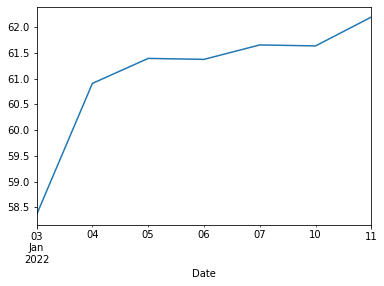

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-09  -  2022-01-19 00:00:00
Increased:  1 Index: 1


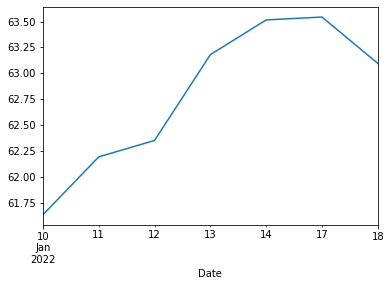

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-16  -  2022-01-26 00:00:00
Increased:  0 Index: 2


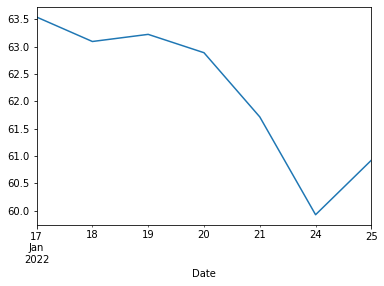

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-23  -  2022-02-02 00:00:00
Increased:  1 Index: 3


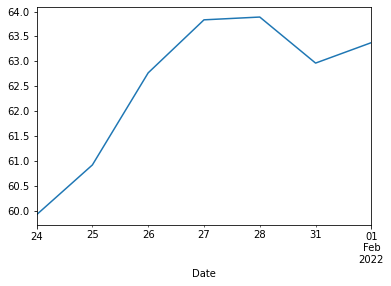

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-30  -  2022-02-09 00:00:00
Increased:  0 Index: 4


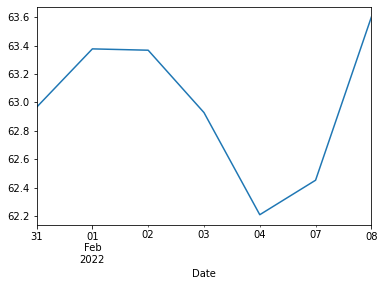

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-06  -  2022-02-16 00:00:00
Increased:  0 Index: 5


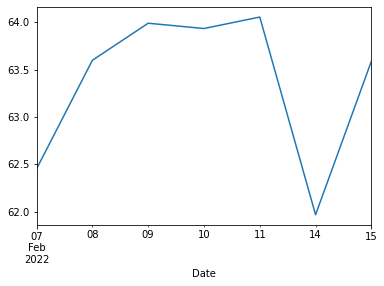

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-13  -  2022-02-23 00:00:00
Increased:  1 Index: 6


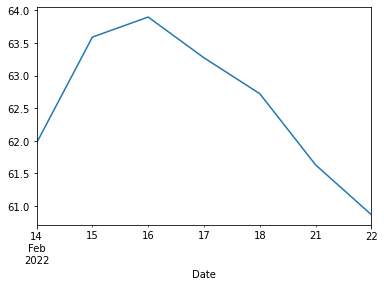

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-20  -  2022-03-02 00:00:00
Increased:  0 Index: 7


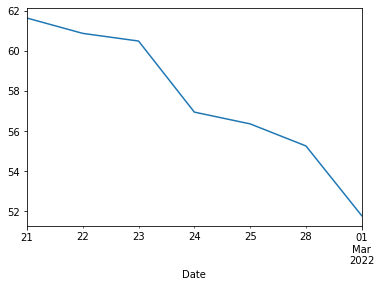

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-27  -  2022-03-09 00:00:00
Increased:  0 Index: 8


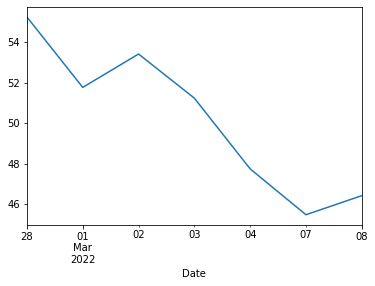

[*********************100%***********************]  1 of 1 completed
Week: 2022-03-06  -  2022-03-16 00:00:00
Increased:  1 Index: 9


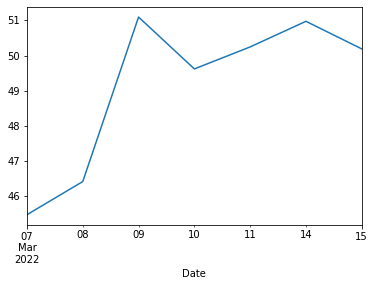

[*********************100%***********************]  1 of 1 completed
Week: 2022-03-13  -  2022-03-23 00:00:00
Increased:  0 Index: 10


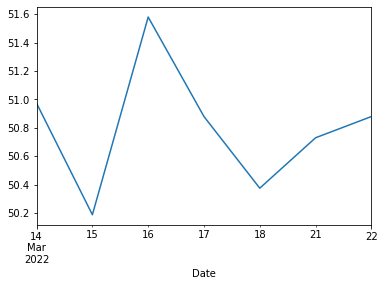

[*********************100%***********************]  1 of 1 completed
Week: 2022-03-20  -  2022-03-30 00:00:00
Increased:  0 Index: 11


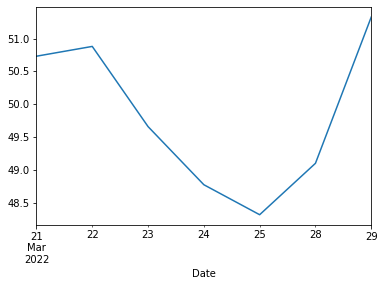

[*********************100%***********************]  1 of 1 completed
Week: 2022-03-27  -  2022-04-06 00:00:00
Increased:  0 Index: 12


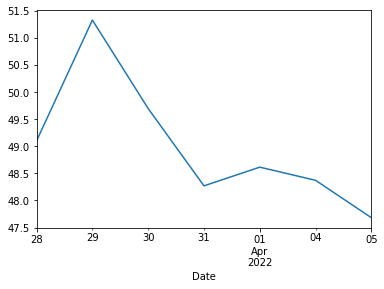

[*********************100%***********************]  1 of 1 completed
Week: 2022-04-03  -  2022-04-13 00:00:00
Increased:  0 Index: 13


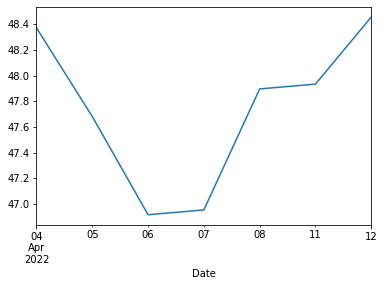

[*********************100%***********************]  1 of 1 completed
Week: 2022-04-10  -  2022-04-20 00:00:00
Increased:  1 Index: 14


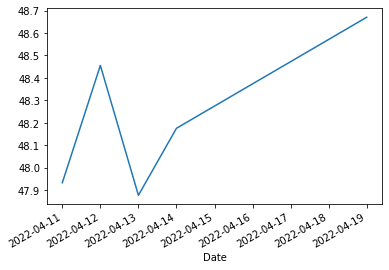

[*********************100%***********************]  1 of 1 completed
Week: 2022-04-17  -  2022-04-27 00:00:00
Increased:  1 Index: 15


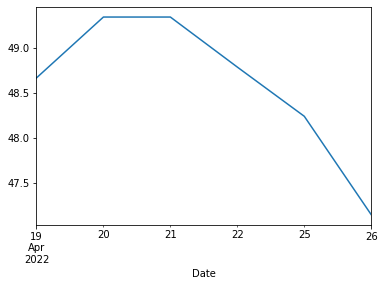

[*********************100%***********************]  1 of 1 completed
Week: 2022-04-24  -  2022-05-04 00:00:00
Increased:  0 Index: 16


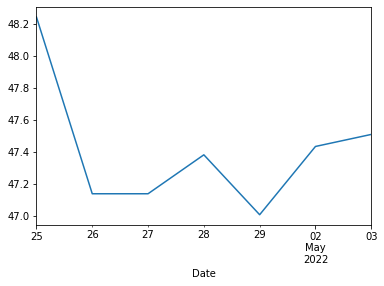

[*********************100%***********************]  1 of 1 completed
Week: 2022-05-01  -  2022-05-11 00:00:00
Increased:  0 Index: 17


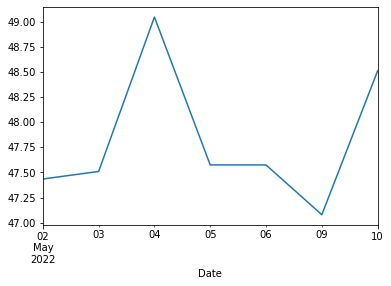

[*********************100%***********************]  1 of 1 completed
Week: 2022-05-08  -  2022-05-18 00:00:00
Increased:  1 Index: 18


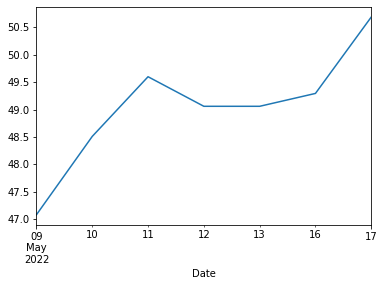

[*********************100%***********************]  1 of 1 completed
Week: 2022-05-15  -  2022-05-25 00:00:00
Increased:  1 Index: 19


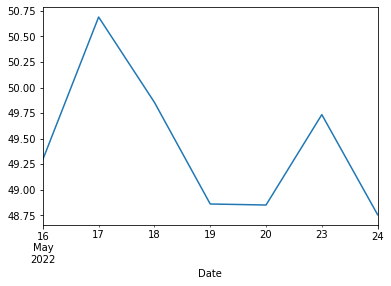

[*********************100%***********************]  1 of 1 completed
Week: 2022-05-22  -  2022-06-01 00:00:00
Increased:  1 Index: 20


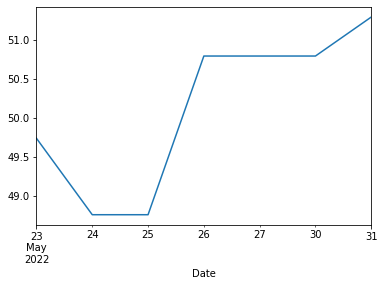

In [49]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

#print the first 20 weekly charts 
for index, row in basf_df.iterrows():
    #set start and end of the week & get data
    start = basf_df.formatted_date[index]

    #end = basf_df.formatted_date[index+1]
    end = datetime.strptime(basf_df.formatted_date[index+1], "%Y-%m-%d") + timedelta(days=1)

    data = yf.download(comp,start,end)
    # Plot the close chart
    print('Week:', start, ' - ',end)
    print('Increased: ', basf_df.increased[index+1], 'Index:', index)
    data['Adj Close'].plot()
    plt.show()
    #stop after printing 20 charts
    if index == 20:
      break

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-02  -  2022-01-09
Increased:  1 Index: 0


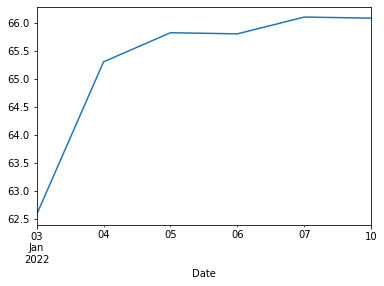

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-09  -  2022-01-16
Increased:  1 Index: 1


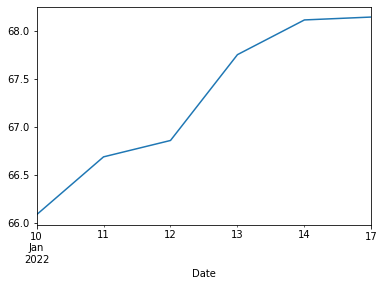

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-16  -  2022-01-23
Increased:  0 Index: 2


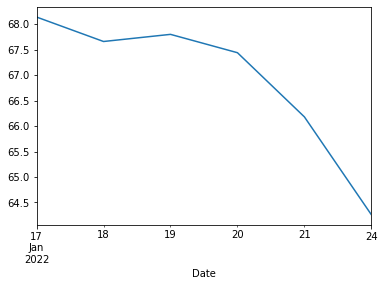

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-23  -  2022-01-30
Increased:  1 Index: 3


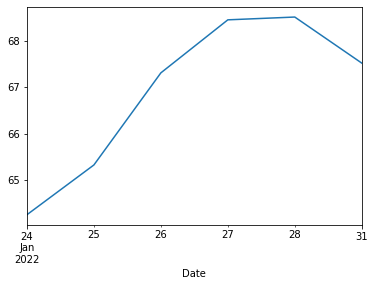

[*********************100%***********************]  1 of 1 completed
Week: 2022-01-30  -  2022-02-06
Increased:  0 Index: 4


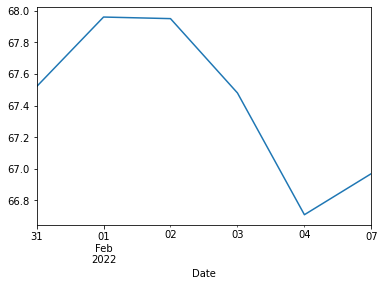

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-06  -  2022-02-13
Increased:  0 Index: 5


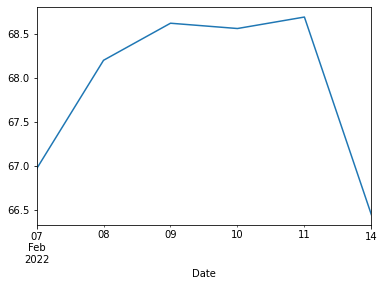

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-13  -  2022-02-20
Increased:  1 Index: 6


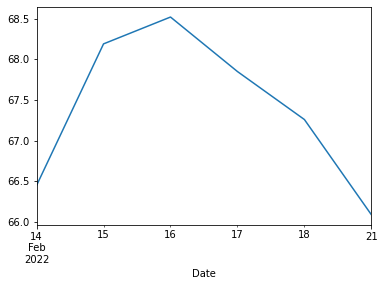

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-20  -  2022-02-27
Increased:  0 Index: 7


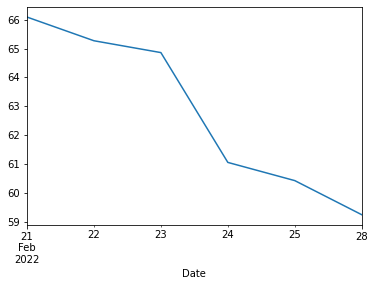

[*********************100%***********************]  1 of 1 completed
Week: 2022-02-27  -  2022-03-06
Increased:  0 Index: 8


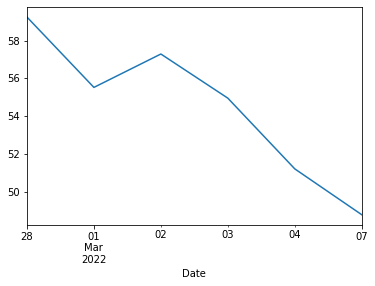

[*********************100%***********************]  1 of 1 completed
Week: 2022-03-06  -  2022-03-13
Increased:  1 Index: 9


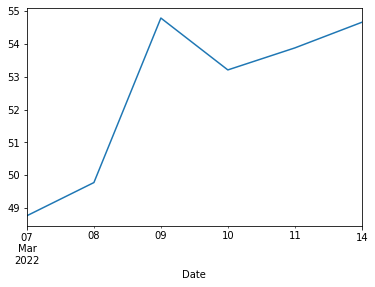

[*********************100%***********************]  1 of 1 completed
Week: 2022-03-13  -  2022-03-20
Increased:  0 Index: 10


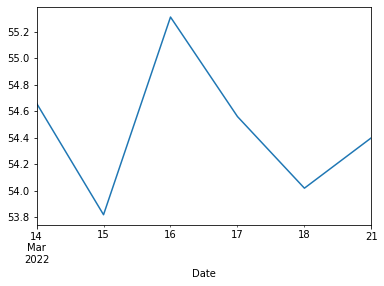

In [66]:
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

#print the first 10 weekly charts 
for index, row in basf_df.iterrows():
    #set start and end of the week & get data
    start = basf_df.formatted_date[index]
    startDate = datetime.strptime(basf_df.formatted_date[index], "%Y-%m-%d") + timedelta(days=0)
    end = basf_df.formatted_date[index+1]
    endDate = datetime.strptime(basf_df.formatted_date[index+1], "%Y-%m-%d") + timedelta(days=2)

    data = yf.download(comp,startDate,endDate)
    # Plot the close chart
    print('Week:', start, ' - ',end)
    print('Increased: ', basf_df.increased[index+1], 'Index:', index)
    data['Close'].plot()
    plt.show()
    #stop after printing 10 charts
    if index == 10:
      break